## Step 1: Load Data
We start by downloading and loading the dataset `data_ffnn.txt`. The file consists of three columns: `x1`, `x2`, and `y`. This is a multi-class problem.


In [72]:
import pandas as pd
import numpy as np

# Load the data
file_path = "data_ffnn.txt"  # Ensure this file is in your working directory
data = pd.read_csv(file_path, delim_whitespace=True, header=0, names=['x1', 'x2', 'y'])

# Display the first few rows
print(data.head())


         x1        x2  y
0  0.015546  0.807941  3
1  0.004527  1.426791  3
2  1.358103  1.193950  3
3  1.372911  0.218337  3
4  0.236595  0.281448  3


## Step 2: Plot the Data
Visualize the data in 2D, coloring each point according to its class.


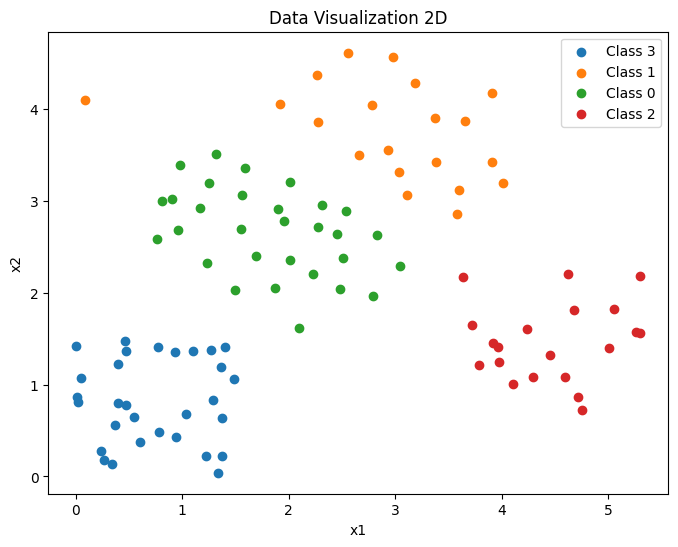

In [73]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(8, 6))
for label in data['y'].unique():
    subset = data[data['y'] == label]
    plt.scatter(subset['x1'], subset['x2'], label=f'Class {label}')
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data Visualization 2D')
plt.legend()
plt.show()


## Step 3: Forward Propagation
We implement forward propagation for a feedforward neural network with three layers. The hidden layer will have `K` neurons.


In [74]:
def forward_propagation(X, V, W):
    """
    Perform forward propagation through the neural network.
    
    Parameters:
    -----------
    X : array-like
        Input data of shape (n_samples, n_features)
    V : array-like
        Weight matrix for hidden layer
    W : array-like
        Weight matrix for output layer
    
    Returns:
    --------
    dict
        Dictionary containing:
        - X_bar: Input data with bias term
        - X_bar_bar: Input to hidden layer
        - F: Hidden layer activation
        - F_bar: Hidden layer output with bias
        - F_bar_bar: Input to output layer
        - G: Network output
        - E: Error value (if y_true is provided)
    """
    # Add bias term to input
    X_bar = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Hidden layer
    X_bar_bar = np.dot(X_bar, V)
    F = 1 / (1 + np.exp(-X_bar_bar))  # sigmoid activation
    F_bar = np.hstack((np.ones((F.shape[0], 1)), F))
    F_bar_bar = np.dot(F_bar, W)
    
    # Output layer
    G = 1 / (1 + np.exp(-F_bar_bar))  # Sigmoid activation
    
    # Store all intermediate values
    cache = {
        'X_bar': X_bar,
        'X_bar_bar': X_bar_bar,
        'F': F,
        'F_bar': F_bar,
        'F_bar_bar': F_bar_bar,
        'G': G
    }
    
    return cache

# Example usage:
# Define network parameters
N = 2  # input features
K = 4  # hidden neurons
J = len(data['y'].unique())  # output classes

# Initialize weights
V = np.random.randn(N + 1, K)
W = np.random.randn(K + 1, J)

# Prepare input data
X = data[['x1', 'x2']].values

# Perform forward propagation
cache = forward_propagation(X, V, W)

# Calculate error if needed
y_one_hot = np.eye(J)[data['y'].astype(int)]
E = 0.5 * np.sum((cache['G'] - y_one_hot) ** 2)
print(f"Error: {E:.4f}")

## Step 4: back propagation


In [75]:
# Define the learning rates
alpha_1, alpha_2 = 10**-3, 10**-3

# Define the number of iterations
iterations = 0

# Define a threshold
threshold = 10**-2

# Define an error array
errors = [10**-5,E]



In [76]:
def backpropagation(V_BP, W_BP, X_bar_BP, F_BP, F_bar_BP, G_BP, y_one_hot_BP, alpha_1_BP, alpha_2_BP):

    
    # Step 1: Calculate output layer error
    delta_G = G_BP * (1 - G_BP) * (G_BP - y_one_hot_BP)
    
    # Step 2: Calculate hidden layer error
    
    # First, get the term coming from the next layer
    dGxWT = np.dot(delta_G, W_BP.T)
    
    # Calculate δf while excluding the bias thats why we do * back_term[:, 1:]
    delta_F = F_BP * (1 - F_BP) * dGxWT[:, 1:]
    
    # Step 3: Calculate gradients
    
    # For output layer weights (W)
    dE_dW = np.dot(F_bar_BP.T, delta_G)
    
    # For hidden layer weights (V)
    dE_dV = np.dot(X_bar_BP.T, delta_F)
    
    # Step 4: Update weights
    
    # Update W and V using gradient descent
    W_new = W_BP - alpha_1_BP * dE_dW
    V_new = V_BP - alpha_2_BP * dE_dV
    
    return W_new, V_new


In [77]:
while abs(errors[-1] - errors[-2]) > threshold:
    
    iterations += 1
    
    # Backpropagation and weight updates
    W, V = backpropagation(V, W, X_bar, F, F_bar, G, y_one_hot, alpha_1, alpha_2)
    
    # Forward propagation
    X_bar_bar = np.dot(X_bar, V)
    F = 1 / (1 + np.exp(-X_bar_bar))
    F_bar = np.hstack((np.ones((F.shape[0], 1)), F))
    F_bar_bar = np.dot(F_bar, W)
    G = 1 / (1 + np.exp(-F_bar_bar))
    
    # Calculate errors
    E = 0.5 * np.sum((G - y_one_hot) ** 2)
    errors.append(E)
    
    if iterations % 100 == 0:
        print(f"Iteration {iterations}, Error: {E}")
        
# Final results
print("\nFinal Error:", errors[-1])
print("Number of iterations:", len(errors))
    


Iteration 100, Error: 43.81267396782774
Iteration 200, Error: 34.463564103850956
Iteration 300, Error: 30.85190620461503
Iteration 400, Error: 28.426689353010758
Iteration 500, Error: 26.62780403114337
Iteration 600, Error: 25.23914383786495
Iteration 700, Error: 24.10907643471416

Final Error: 23.905955870444366
Number of iterations: 722


## Step 5: Plotting the errors

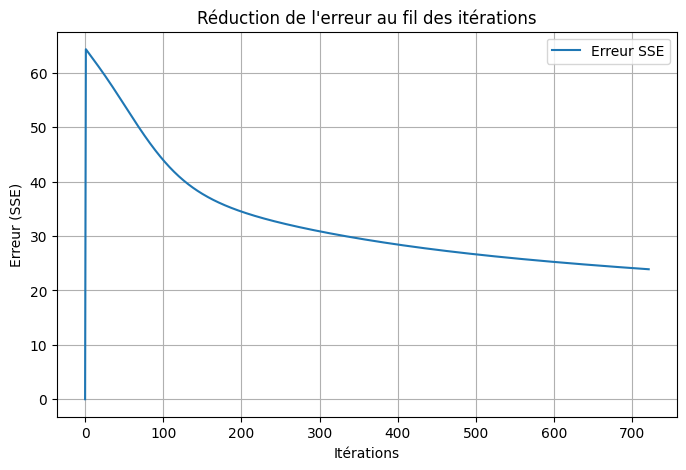

In [78]:
# Tracer la réduction de l'erreur
plt.figure(figsize=(8, 5))
plt.plot(errors, label="Erreur SSE")
plt.xlabel("Itérations")
plt.ylabel("Erreur (SSE)")
plt.title("Réduction de l'erreur au fil des itérations")
plt.legend()
plt.grid()
plt.show()

## Step 6: Optimal parameters

Optimal Parameters for Hidden Layer (V):
----------------------------------------

V matrix shape: (3, 4)
            h1        h2        h3        h4
bias  0.327376  1.454629 -1.284981  1.255298
x1   -0.576054 -0.618037  1.407915 -1.146688
x2   -0.497747 -0.987657 -1.248308  1.207644

Interpretation:
- Rows: Input nodes (bias, x1, x2)
- Columns: Hidden layer neurons (h1 to h4)


Optimal Parameters for Output Layer (W):
----------------------------------------

W matrix shape: (5, 4)
       output1   output2   output3   output4
bias -0.474451 -0.740053 -0.929937  0.687564
h1    0.271309  0.271646 -1.036677  0.884607
h2   -1.702944 -0.442131  1.509115  2.891483
h3   -0.847604 -0.160171  1.592578 -2.454672
h4    0.446624 -0.816386 -1.620876 -1.829419

Interpretation:
- Rows: Hidden layer nodes (bias + hidden neurons)
- Columns: Output layer neurons

Weight Statistics:
------------------

Hidden Layer (V):
Mean weight: -0.0589
Weight std: 1.0669
Min weight: -1.2850
Max weight: 1.4546

Out

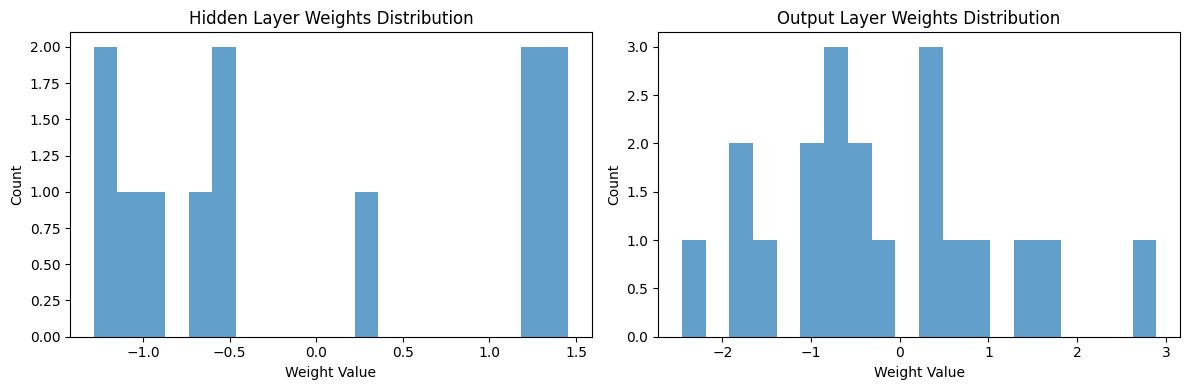


Input Feature Importance:
------------------------
x1: 0.9372
x2: 0.9853


In [79]:
def display_optimal_parameters(V, W):
    # Format V weights (hidden layer)
    print("Optimal Parameters for Hidden Layer (V):")
    print("----------------------------------------")
    v_df = pd.DataFrame(V, 
                       index=['bias', 'x1', 'x2'],
                       columns=[f'h{i+1}' for i in range(V.shape[1])])
    print("\nV matrix shape:", V.shape)
    print(v_df)
    print("\nInterpretation:")
    print("- Rows: Input nodes (bias, x1, x2)")
    print("- Columns: Hidden layer neurons (h1 to h4)")
    
    print("\n\nOptimal Parameters for Output Layer (W):")
    print("----------------------------------------")
    w_df = pd.DataFrame(W,
                       index=['bias'] + [f'h{i+1}' for i in range(V.shape[1])],
                       columns=[f'output{i+1}' for i in range(W.shape[1])])
    print("\nW matrix shape:", W.shape)
    print(w_df)
    print("\nInterpretation:")
    print("- Rows: Hidden layer nodes (bias + hidden neurons)")
    print("- Columns: Output layer neurons")
    
    # Additional Analysis
    print("\nWeight Statistics:")
    print("------------------")
    print("\nHidden Layer (V):")
    print(f"Mean weight: {V.mean():.4f}")
    print(f"Weight std: {V.std():.4f}")
    print(f"Min weight: {V.min():.4f}")
    print(f"Max weight: {V.max():.4f}")
    
    print("\nOutput Layer (W):")
    print(f"Mean weight: {W.mean():.4f}")
    print(f"Weight std: {W.std():.4f}")
    print(f"Min weight: {W.min():.4f}")
    print(f"Max weight: {W.max():.4f}")
    
    # Visualize weight distributions
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(121)
    plt.hist(V.flatten(), bins=20, alpha=0.7)
    plt.title('Hidden Layer Weights Distribution')
    plt.xlabel('Weight Value')
    plt.ylabel('Count')
    
    plt.subplot(122)
    plt.hist(W.flatten(), bins=20, alpha=0.7)
    plt.title('Output Layer Weights Distribution')
    plt.xlabel('Weight Value')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

# Call the function with the optimal weights
display_optimal_parameters(V, W)

# Calculate and display the importance of input features
print("\nInput Feature Importance:")
print("------------------------")
input_importance = np.abs(V[1:, :]).mean(axis=1)  # Exclude bias row
features = ['x1', 'x2']
for feature, importance in zip(features, input_importance):
    print(f"{feature}: {importance:.4f}")

## Step 7: plotting training outputs values vs Predicted values

Classification Accuracy: 80.00%


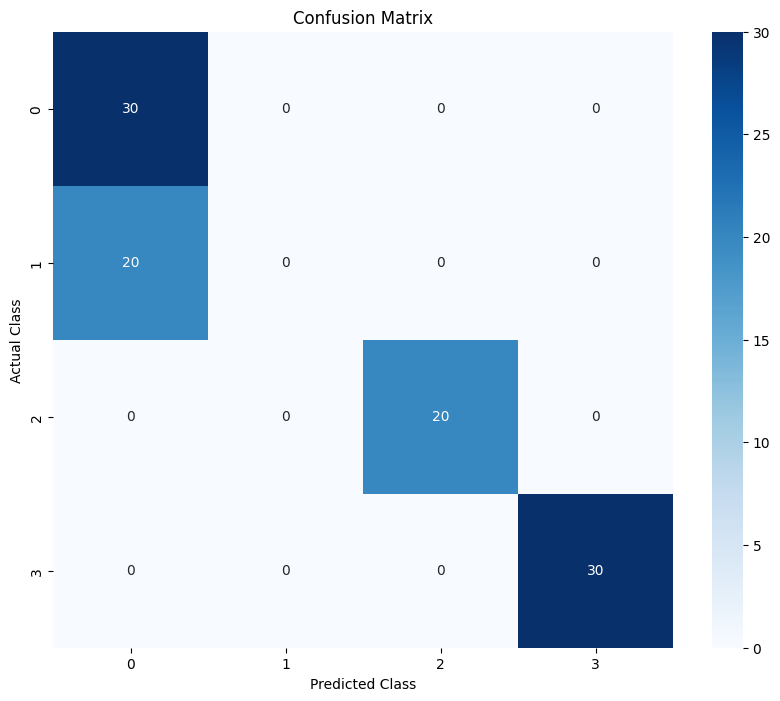

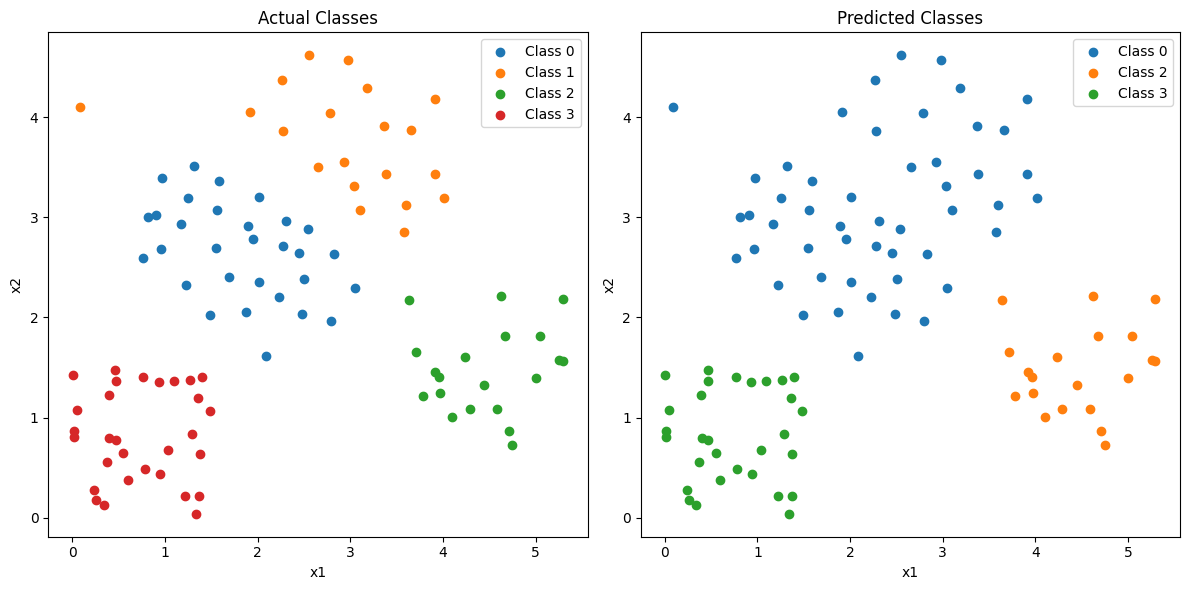


Detailed Comparison (first 10 samples):
Sample	Actual	Predicted
------------------------------
0	3	3
1	3	3
2	3	3
3	3	3
4	3	3
5	3	3
6	3	3
7	3	3
8	3	3
9	3	3


In [80]:
# Get predictions
def predict(X_bar, V, W):
    # Forward pass
    X_bar_bar = np.dot(X_bar, V)
    F = 1 / (1 + np.exp(-X_bar_bar))
    F_bar = np.hstack((np.ones((F.shape[0], 1)), F))
    F_bar_bar = np.dot(F_bar, W)
    G = 1 / (1 + np.exp(-F_bar_bar))
    return G

# Get predictions for training data
predicted_outputs = predict(X_bar, V, W)
predicted_classes = np.argmax(predicted_outputs, axis=1)
actual_classes = data['y'].values

# Calculate accuracy
accuracy = np.mean(predicted_classes == actual_classes)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

# Create confusion matrix display
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(actual_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

# Plot predicted vs actual classes
plt.figure(figsize=(12, 6))

# Plot actual classes
plt.subplot(121)
for label in np.unique(actual_classes):
    mask = actual_classes == label
    plt.scatter(X[mask, 0], X[mask, 1], label=f'Class {label}')
plt.title('Actual Classes')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

# Plot predicted classes
plt.subplot(122)
for label in np.unique(predicted_classes):
    mask = predicted_classes == label
    plt.scatter(X[mask, 0], X[mask, 1], label=f'Class {label}')
plt.title('Predicted Classes')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.tight_layout()
plt.show()

# Print detailed comparison
print("\nDetailed Comparison (first 10 samples):")
print("Sample\tActual\tPredicted")
print("-" * 30)
for i in range(10):
    print(f"{i}\t{actual_classes[i]}\t{predicted_classes[i]}")

## Step 8: Testing the model with values

In [79]:
# Test data points
X_test = np.array([
    [0, 0],    # Test point 1
    [2, 2],    # Test point 2
    [4, 4],    # Test point 3
    [4.5, 1.5] # Test point 4
])

# Add bias term to test data
X_test_bar = np.hstack((np.ones((X_test.shape[0], 1)), X_test))



# Get predictions
predictions = forward_propagation(X_test_bar, V, W)
predicted_classes = np.argmax(predictions, axis=1)

# Print results
print("Test Results:")
print("-" * 50)
print("Input Point (x1, x2) | Predicted Class | Output Probabilities")
print("-" * 50)
for i, (point, pred_class, probs) in enumerate(zip(X_test, predicted_classes, predictions)):
    print(f"({point[0]:<4}, {point[1]:<4})      | {pred_class:<14} | {probs}")

# Visualize test points along with training data
plt.figure(figsize=(10, 6))

# Plot training data
for label in data['y'].unique():
    mask = data['y'] == label
    plt.scatter(data[mask]['x1'], data[mask]['x2'], 
               label=f'Training Class {label}', alpha=0.5)

# Plot test points
plt.scatter(X_test[:, 0], X_test[:, 1], 
           color='red', marker='*', s=200, 
           label='Test Points')

# Add annotations for test points
for i, (x, y) in enumerate(X_test):
    plt.annotate(f'T{i+1}', (x, y), 
                xytext=(10, 10), textcoords='offset points')

plt.title('Test Points Visualization')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

## Step 9: Plot classification results